### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "xing_emitt_scan_round_150_1500"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                      
lhcb1 -60.0    -60.0    5.0 5.0 62.315 60.32 1.400000e+11            2.2       2.2       120.0               base_collider   
                                                                                         130.0               base_collider   
                                                                                         140.0               base_collider   
                                                                                         150.0               base_collider   
                                                                                         160.0               base_collider   
...                                                                                                                    ...   
                                                                     3.0       3.0       230.0               base_collider   
                                                                                         240.0               base_collider   
                                                                                         250.0               base_collider   
                                                                                         260.0               base_collider   
                                                                                         270.0               base_collider   

                                                                                                         normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                                     
lhcb1 -60.0    -60.0    5.0 5.0 62.315 60.32 1.400000e+11            2.2       2.2       120.0                                      2.621   
                                                                                         130.0                                      2.966   
                                                                                         140.0                                      3.724   
                                                                                         150.0                                      4.069   
                                                                                         160.0                                      4.552   
...                                                                                                                                   ...   
                                                                     3.0       3.0       230.0                                      6.000   
                                                                                         240.0                                      6.552   
                                                                                         250.0                                      6.759   
                                                                                         260.0                                      6.483   
                                                                                         270.0                                      6.621   

                                                                                                             qx  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle           
lhcb1 -60.0    -60.0    5.0 5.0 62.315 60.32 1.400000e+11            2.2       2.2       120.0           62.315   
                                                                                         130.0           62.315   
                                                                                         140.0           62.315   
                                                        

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="n_emitt_x", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
n_emitt_x,,,,,,,,,,,,,,,,
2.20,2.621,2.966,3.724,4.069,4.552,4.690,4.828,5.586,5.310,5.931,6.138,6.414,7.172,6.966,6.897,6.828
2.25,2.690,2.966,3.586,4.000,4.414,5.034,5.379,5.172,5.034,5.310,6.690,6.552,7.103,7.172,7.103,6.552
2.30,2.621,2.897,3.517,4.138,4.552,4.828,5.172,5.034,5.517,6.069,6.414,6.207,6.483,7.103,7.172,7.034
2.35,2.621,2.621,3.241,3.793,4.276,4.966,5.172,5.448,5.379,5.724,5.862,6.345,6.552,7.172,6.690,6.966
2.40,2.483,2.897,3.310,3.586,4.345,4.483,4.759,5.379,5.448,5.931,6.000,6.138,6.207,7.172,6.759,6.690
2.45,2.345,2.759,3.103,3.862,4.483,4.690,5.172,5.103,5.172,5.724,6.345,6.690,7.034,6.759,6.828,6.966
2.50,2.552,2.828,3.172,3.862,4.138,4.345,5.172,5.379,5.517,5.172,6.483,6.483,6.828,7.310,6.690,6.690
2.55,2.483,2.759,3.241,3.586,4.207,4.621,4.759,4.828,5.517,5.931,6.000,6.207,5.655,7.103,6.897,6.483
2.60,2.276,2.690,3.310,3.586,4.207,4.552,4.621,5.310,5.448,5.448,6.207,6.414,6.483,6.621,7.172,6.552


In [4]:
array_xing = np.linspace(120, 270, 16, endpoint=True)
df_to_plot.columns = [str(xing) for xing in array_xing]

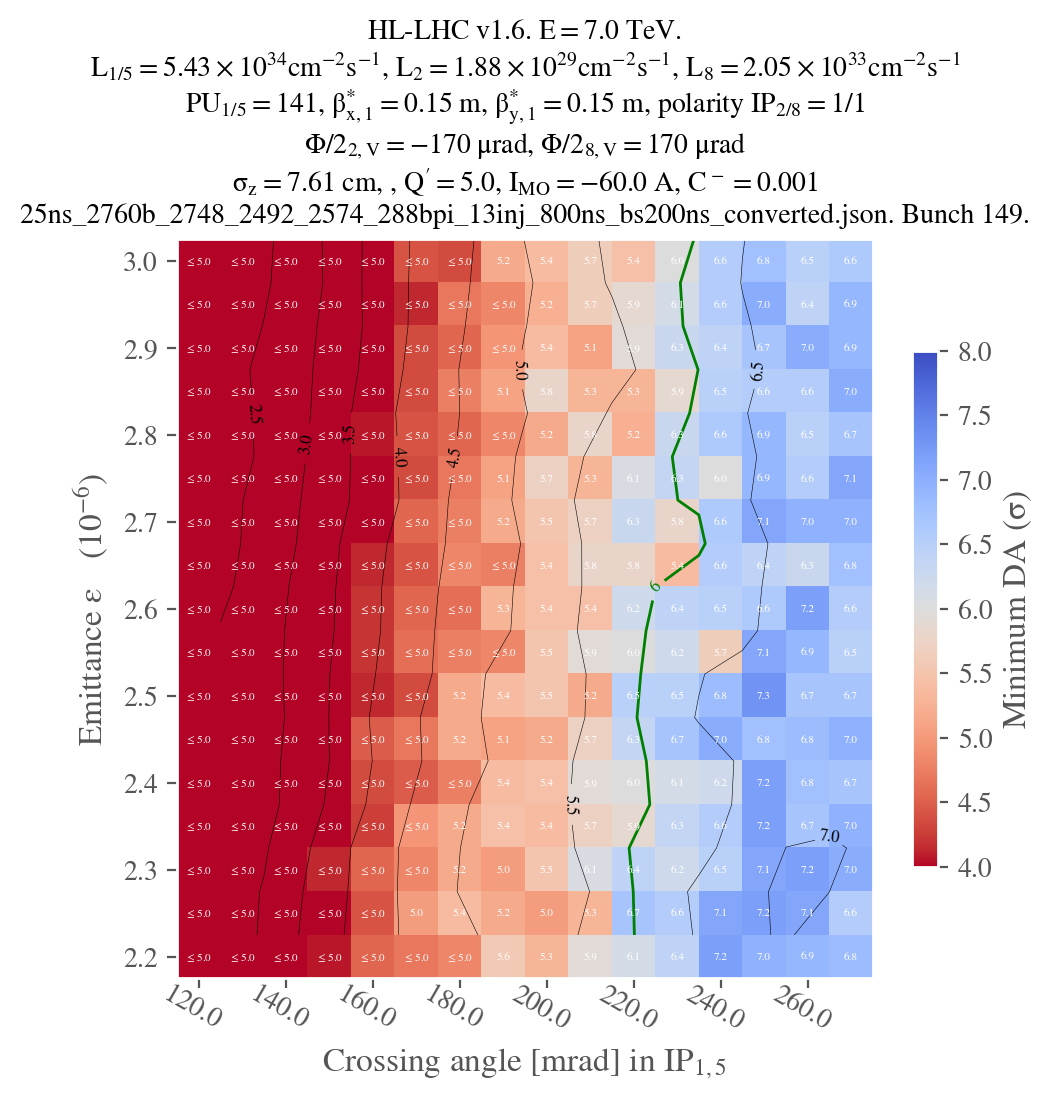

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing = False,
    display_emit = False,
    vmin=4.,
    vmax=8.0,
    CC = False,
    ignore_lumi_1_5 = False,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"Emittance $\varepsilon \quad (10^{-6})$",
)
# ! Verified
